# Homework 3.
## Provide answers to each question. Show Python codes to back up your answer. All answers should be based on the input files provided.

In [1]:
import pandas as pd
import seaborn as sns

## Read the provided csv file into a dataframe

In [2]:
df1 = pd.read_csv('hw3-mort.csv')

## 1. (5) How many rows and columns are there in this dataset? Show Pandas method to find it out

In [3]:
df1.shape

(476, 3)

## 2. (5) How many NaNs in the Year, AgeGroup, and DeathRate columns?

In [4]:
# There are 3 NaNs in Year, 0 NaN in AgeGroup, 4 NaN in DeathRate     
mortality = df1[df1[['Year','AgeGroup','DeathRate']].isnull().any(axis=1)]
print(mortality.Year.value_counts(dropna=False))
print(mortality.AgeGroup.value_counts(dropna=False))
print(mortality.DeathRate.value_counts(dropna=False))

NaN       3
1907.0    1
1902.0    1
Name: Year, dtype: int64
01-04 Years    5
Name: AgeGroup, dtype: int64
NaN       4
1695.0    1
Name: DeathRate, dtype: int64


## 3. (5) Smooth the missing values using linear interpolation. Show the result.

In [5]:
df1 = df1.interpolate()
df1.head(1000)

,Year,AgeGroup,DeathRate
0,1900.0,01-04 Years,1983.80
1,1901.0,01-04 Years,1695.00
2,1902.0,01-04 Years,1618.55
3,1903.0,01-04 Years,1542.10
4,1904.0,01-04 Years,1520.50
...,...,...,...
471,2014.0,15-19 Years,45.50
472,2015.0,15-19 Years,48.30
473,2016.0,15-19 Years,51.20
474,2017.0,15-19 Years,51.50


## 4. (10) Display a chart that shows the mortality of all age groups between 2000 and 2018 using four subplots. Provide proper titles. The x-axis should have these x-tick labels: 2000, 2002, 2004, ..., 2016, and 2018. Make sure that the x-tick do not overlap.

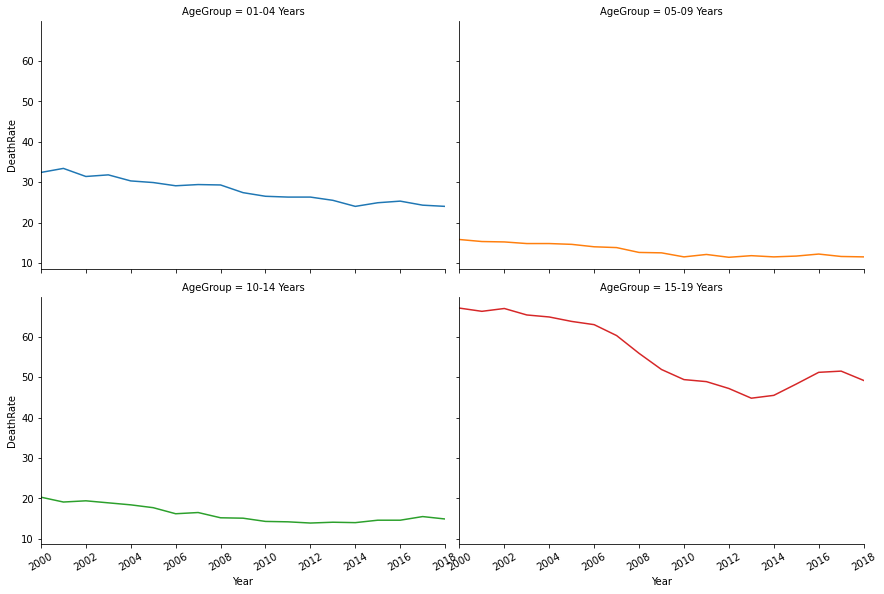

In [6]:
g=sns.relplot(data=df1.query('Year>=2000 and Year<=2018'), kind='line', x='Year', y='DeathRate', hue='AgeGroup', height=4, aspect=1.5, col='AgeGroup',col_wrap=2, legend=False)
for ax in g.axes.flat:
    ax.set(xticks=[x for x in range(2000, 2019, 2)],
           xlim=(2000,2018))    
    ax.tick_params('x', labelrotation=30)

 ## 5. (10) Show a pie chart that shows the mortality rate of the age group 15-19 in the year 1970, 1980, 1990, 2000, 2010, and 2018.

<AxesSubplot:ylabel='DeathRate'>

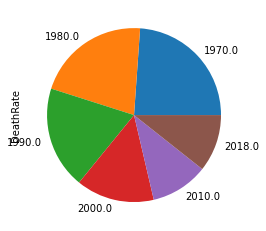

In [7]:
df1.query("AgeGroup=='15-19 Years' and Year in (1970,1980,1990,2000,2010,2018)").groupby('Year')['DeathRate'].sum().plot.pie()

# _____Read the provided csv file into a dataframe_____

In [8]:
df2 = pd.read_csv('hw3-polls.csv')

## 1. (5) Show the column that has the most null (or NaN) values.

In [9]:
table=df2.isnull().sum() # multidiversions has the most null values
table[table == table.max()]

multiversions    12588
dtype: int64

## 2. (5) Drop all rows except where the type column contains a value of "now-cast".  Show the shape of the new dataframe. 

In [10]:
df2.query("type=='now-cast'").shape

(4208, 27)

## 3. (5) Drop all columns that contain only one value (like the column 'cycle'). Show the shape of the dataframe again.

In [11]:
for col in df2.columns:
    if df2[col].nunique()==1:
        df2.drop(col,inplace=True,axis=1)
        
df2.shape

(12624, 22)

## 4. (10) Drop all rows where the state column has a value "U.S.". Examine the state values and change 'Maine CD-#' to 'Maine'. Do the same to 'Nebraska'.  Then, run the codes in the following cell and show the result.

In [12]:
df2=df2[df2.state!='U.S.']
df2.state.replace(to_replace='^Maine CD-\d$',value='Maine',regex=True,inplace=True)
df2.state.replace(to_replace='^Nebraska CD-\d$',value='Nebraska',regex=True,inplace=True)
print(df2.query('state == "Maine"').shape, df2.query('state == "Nebraska"').shape)

(234, 22) (138, 22)


## 6. (15) Show a pie chart that shows the total number of polls conducted in Illinois, Indiana, Iowa, Michigan, Nebraska, Ohio, and Pennsylvania.

<AxesSubplot:ylabel='state'>

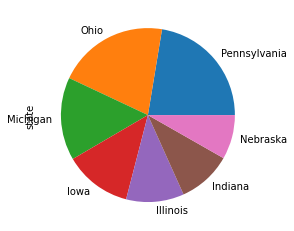

In [13]:
df2.query("state in ('Illinois','Indiana','Iowa','Michigan','Nebraska','Ohio','Pennsylvania')").state.value_counts().plot(kind='pie')

## 7. (10) Show top five states where the polls were conducted most of times, and bottom five states where the polls were conducted least amount of times. Show state names and the number of polls conducted for those states.

In [14]:
with pd.option_context('display.max_rows', 10,'display.max_columns', None):
    display(df2['state'].value_counts(ascending=False))

Florida                 444
Pennsylvania            375
North Carolina          375
Ohio                    345
New Hampshire           336
                       ... 
North Dakota             93
Wyoming                  87
Rhode Island             87
Hawaii                   84
District of Columbia     78
Name: state, Length: 51, dtype: int64

## 8. (15) Show the result of problem 7 using bar chart. Provide proper headings and x-axis/y-axis labels. 

<AxesSubplot:title={'center':'Conducted Polls Per State'}>

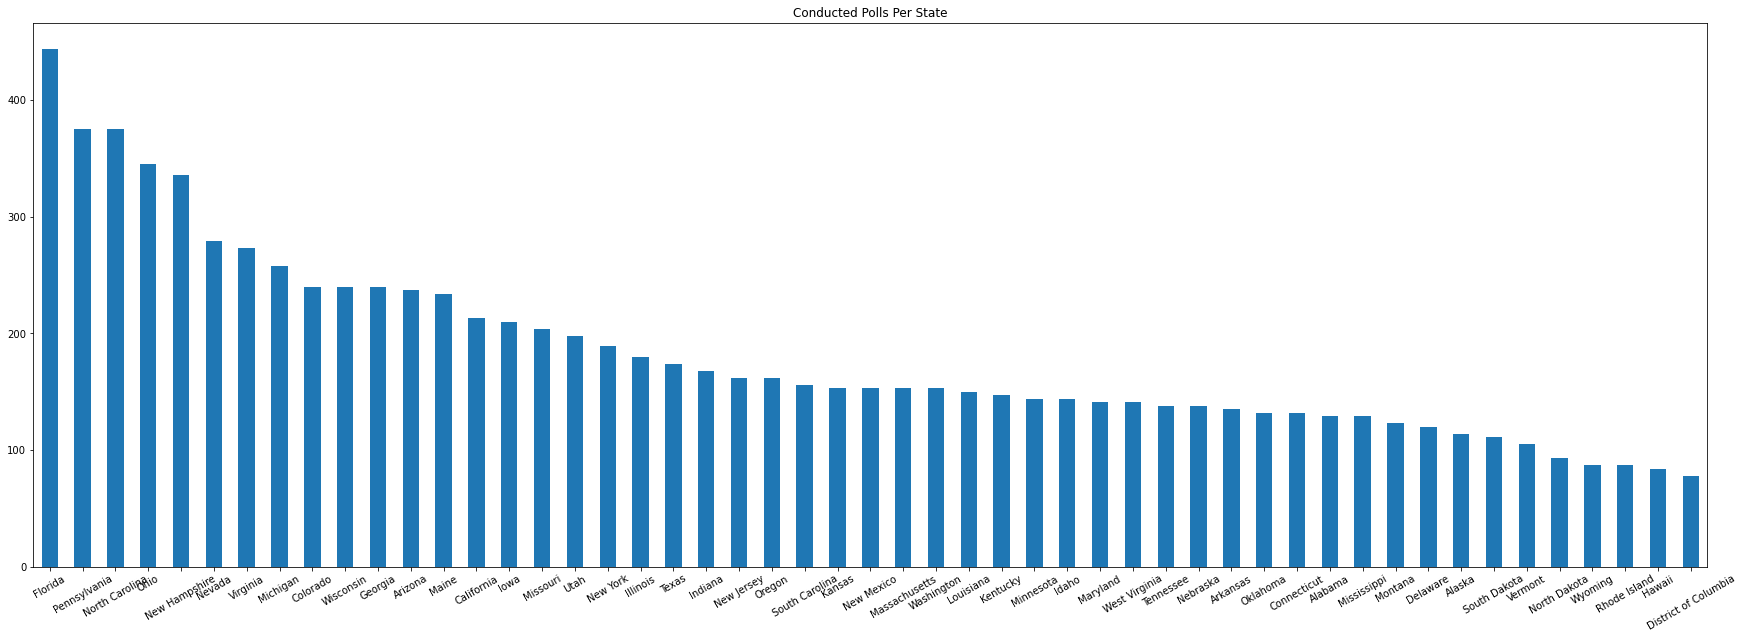

In [15]:
df2['state'].value_counts(ascending=False).plot(figsize=(30,10),x='',kind='bar',title='Conducted Polls Per State',rot=30)